In [1]:
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import os; os.chdir("../src")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import networkx as nx

# Analytical and numerical analysis of the nominal assortativity 

In [4]:
import assortativity
import network_generator.er_mixing

## Figure 2

In [5]:
from assortativity import analytical_assortativity

In [6]:
hss = np.arange(0.0, 1.001, 0.001)
bss = np.arange(0.0001, 0.501, 0.001)

### Figure 2A (only analytical, without simulation)

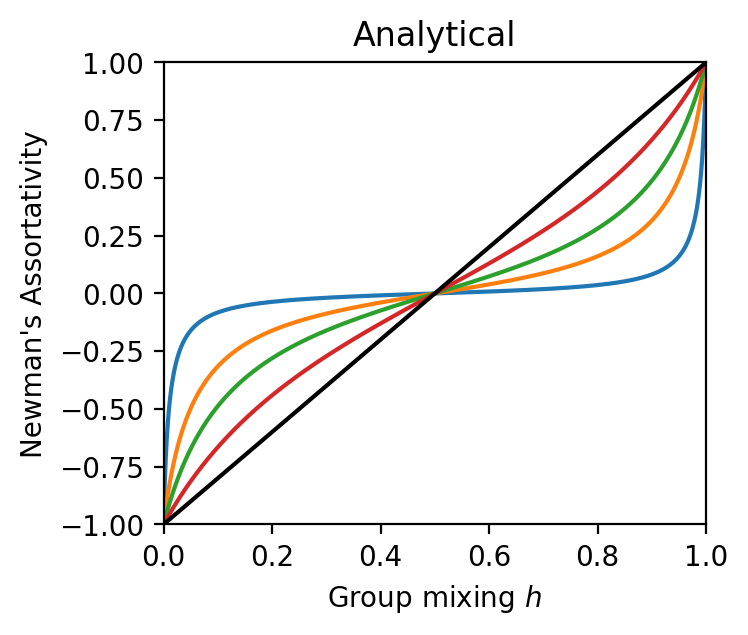

In [7]:
plt.figure(figsize=(3.5, 3))
b = 0.01
plt.plot(hss, [analytical_assortativity(b, h, h) for h in hss])
b = 0.05
plt.plot(hss, [analytical_assortativity(b, h, h) for h in hss])
b = 0.1
plt.plot(hss, [analytical_assortativity(b, h, h) for h in hss])
b = 0.2
plt.plot(hss, [analytical_assortativity(b, h, h) for h in hss])
plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.plot([0, 1], [-1, 1.0], color='k')
plt.title("Analytical", fontsize=12)
plt.ylabel("Newman's Assortativity")
plt.xlabel("Group mixing $h$");

### Figure 2B (only analytical, without simulation)

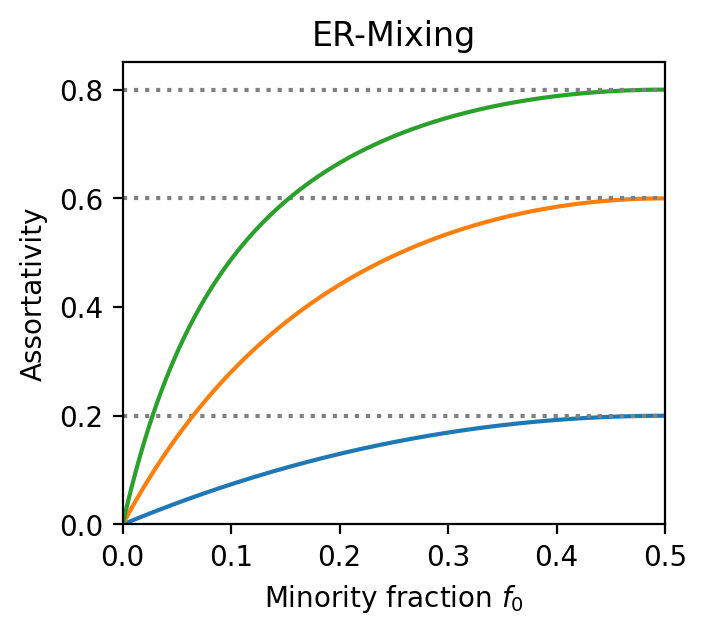

In [8]:
plt.figure(figsize=(3.5, 3))
h = 0.6
values = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, values, label="Analytical")
plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
h = 0.8
values = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, values, label="Analytical")
plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
h = 0.9
values = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, values, label="Analytical")
plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
plt.ylim(0, .85)
plt.xlim(0, .5)
plt.title("ER-Mixing", fontsize=12)
plt.ylabel("Assortativity")
plt.xlabel("Minority fraction $f_0$");

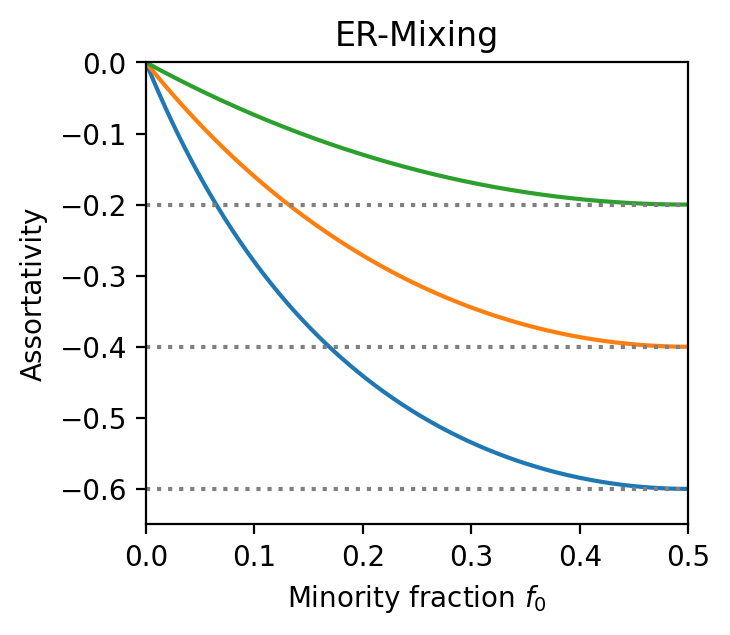

In [9]:
plt.figure(figsize=(3.5, 3))

h = 0.2
values = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, values, label="Analytical")

plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
h = 0.3
values = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, values, label="Analytical")

plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
h = 0.4
values = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, values, label="Analytical")

plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
plt.ylim(-.65, 0)
plt.xlim(0, .5)
plt.title("ER-Mixing", fontsize=12)
plt.ylabel("Assortativity")
plt.xlabel("Minority fraction $f_0$");

The above plots only included the analytical formulation; next we include simulations.

In [10]:
N = 500
S = 60
1/N 

0.002

#### Generating networks with three homophily levels:

In [11]:
random_f_0 = np.random.rand(S)*0.5
random_f_0 = random_f_0[random_f_0*N >= 1]
random_f_0 = np.linspace(1./N, 0.999, S)

In [12]:
h_1, h_2, h_3 = .6, .8, .9
assortativity_h_1 = []
assortativity_h_2 = []
assortativity_h_3 = []

adjusted_assortativity_h_1 = []
adjusted_assortativity_h_2 = []
adjusted_assortativity_h_3 = []

for b in random_f_0:
    g = network_generator.er_mixing.generate(N, b, h_1, h_1)
    assortativity_h_1.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_h_1.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g
    g = network_generator.er_mixing.generate(N, b, h_2, h_2)
    assortativity_h_2.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_h_2.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g
    g = network_generator.er_mixing.generate(N, b, h_3, h_3)
    assortativity_h_3.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_h_3.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g

/home/marcos/pyworkspace/assortativity_publish/assortativity/src/assortativity.py:38: RuntimeWarning: invalid value encountered in divide
  absolute_mixing_matrix = np.divide(absolute_mixing_matrix, e_line)


#### Generating networks with three minority fractions:

In [13]:
S = 30
random_h = np.random.rand(S)
random_h = np.linspace(0.001, 0.99, S)

In [14]:
f_0_1, f_0_2, f_0_3 = .05, .1, .2
assortativity_f_0_1_ = []
assortativity_f_0_2_ = []
assortativity_f_0_3_ = []

adjusted_assortativity_f_0_1_ = []
adjusted_assortativity_f_0_2_ = []
adjusted_assortativity_f_0_3_ = []

for h in random_h:
    g = network_generator.er_mixing.generate(N, f_0_1, h, h)
    assortativity_f_0_1_.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_f_0_1_.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g
for h in random_h:
    g = network_generator.er_mixing.generate(N, f_0_2, h, h)
    assortativity_f_0_2_.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_f_0_2_.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g
for h in random_h:
    g = network_generator.er_mixing.generate(N, f_0_3, h, h)
    assortativity_f_0_3_.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_f_0_3_.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g

For visualization, let's add just a bit of noise for measuring the adjusted assortativity, otherwise the points will be on the top of each other.

In [15]:
random_h_0 = random_h + np.random.rand(S)*0.02
random_h_1 = random_h + np.random.rand(S)*0.02
random_h_2 = random_h + np.random.rand(S)*0.02

In [16]:
random_h_0[-1] = 2 - random_h_0[-1]
random_h_1[-1] = 2 - random_h_1[-1]
random_h_2[-1] = 2 - random_h_2[-1]

In [17]:
f_0_1, f_0_2, f_0_3 = .05, .1, .2
assortativity_f_0_1 = []
assortativity_f_0_2 = []
assortativity_f_0_3 = []

adjusted_assortativity_f_0_1 = []
adjusted_assortativity_f_0_2 = []
adjusted_assortativity_f_0_3 = []

for h in random_h_0:
    g = network_generator.er_mixing.generate(N, f_0_1, h, h)
    assortativity_f_0_1.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_f_0_1.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g
for h in random_h_1:
    g = network_generator.er_mixing.generate(N, f_0_2, h, h)
    assortativity_f_0_2.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_f_0_2.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g
for h in random_h_2:
    g = network_generator.er_mixing.generate(N, f_0_3, h, h)
    assortativity_f_0_3.append(assortativity.nx_assortativity(g, 'color'))
    adjusted_assortativity_f_0_3.append(assortativity.nx_adjusted_assortativity(g, 'color'))
    del g

In [18]:
values_1 = np.array([[analytical_assortativity(f_0, h, h) for f_0 in bss] for h in hss])
values_2 = np.array([[analytical_assortativity(0.5, h, h) for f_0 in bss] for h in hss])

In [19]:
ms_simulation = 2.
mew_simulation = .4
max_values = 80

In [20]:
colors_h = ['#54278f','#807dba','#bcbddc']
colors_f_0 = ['#238b45','#006d2c','#00441b']
colors_f_0 = ['#7f2704','#d94801','#fdae6b']

### Figure 2A (analytical and simulation)

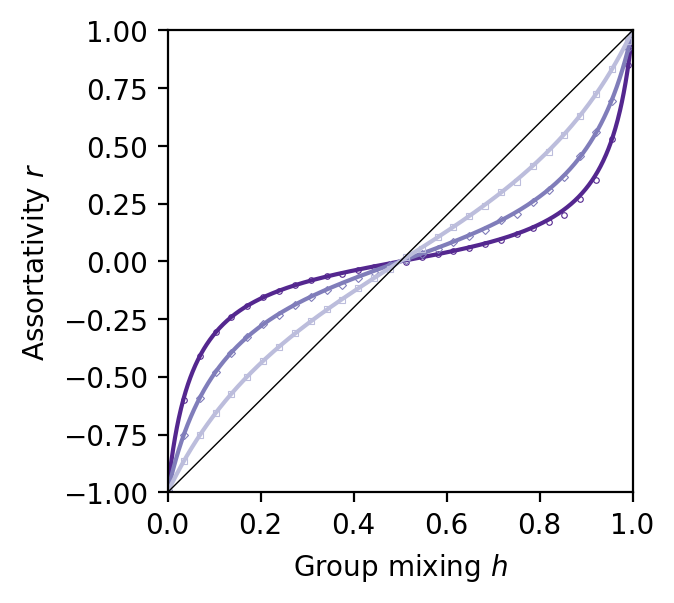

In [21]:
plt.figure(figsize=(3, 3))
b = 0.05
plt.plot(hss, [analytical_assortativity(b, h, h) for h in hss], color=colors_h[0])
plt.plot(random_h[:max_values], assortativity_f_0_1_[:max_values], ls="", mew=mew_simulation, marker="o", ms=ms_simulation, mec=colors_h[0], color="None")

b = 0.1
plt.plot(hss, [analytical_assortativity(b, h, h) for h in hss], color=colors_h[1])
plt.plot(random_h[:max_values], assortativity_f_0_2_[:max_values], ls="", mew=mew_simulation, marker="D", ms=ms_simulation, mec=colors_h[1], color="None")

b = 0.2
plt.plot(hss, [analytical_assortativity(b, h, h) for h in hss], color=colors_h[2])
plt.plot(random_h[:max_values], assortativity_f_0_3_[:max_values], ls="", mew=mew_simulation, marker="s", ms=ms_simulation, mec=colors_h[2], color="None")

plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.plot([0, 1], [-1, 1.0], color='k', lw=.5)
plt.ylabel("Assortativity $r$");
plt.xlabel("Group mixing $h$");

### Figure 2B (analytical and simulation)

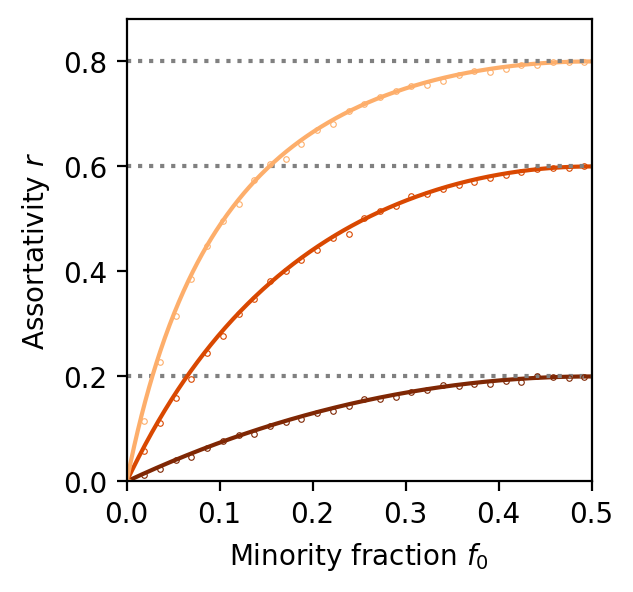

In [22]:
plt.figure(figsize=(3, 3))

h = 0.6
v = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, v, label="Analytical", color=colors_f_0[0])
plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
plt.plot(random_f_0[:max_values], assortativity_h_1[:max_values], ls="", marker="o", mew=mew_simulation, ms=ms_simulation, mec=colors_f_0[0], color="None")

h = 0.8
v = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, v, label="Analytical", color=colors_f_0[1])
plt.plot(random_f_0[:max_values], assortativity_h_2[:max_values], ls="", marker="o", mew=mew_simulation, ms=ms_simulation, mec=colors_f_0[1], color="None")

plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
h = 0.9
v = [analytical_assortativity(f_0, h, h) for f_0 in bss]
plt.plot(bss, v, label="Analytical", color=colors_f_0[2])
plt.plot(random_f_0[:max_values], assortativity_h_3[:max_values], ls="", marker="o", mew=mew_simulation, ms=ms_simulation, mec=colors_f_0[2], color="None")

plt.axhline(analytical_assortativity(.5, h, h), color="gray", ls=":")
plt.ylim(0, .88)
plt.xlim(0, .5)
plt.yticks(np.arange(0, 0.85, 0.2))
plt.ylabel("Assortativity $r$");
plt.xlabel("Minority fraction $f_0$");

### Figure 2C

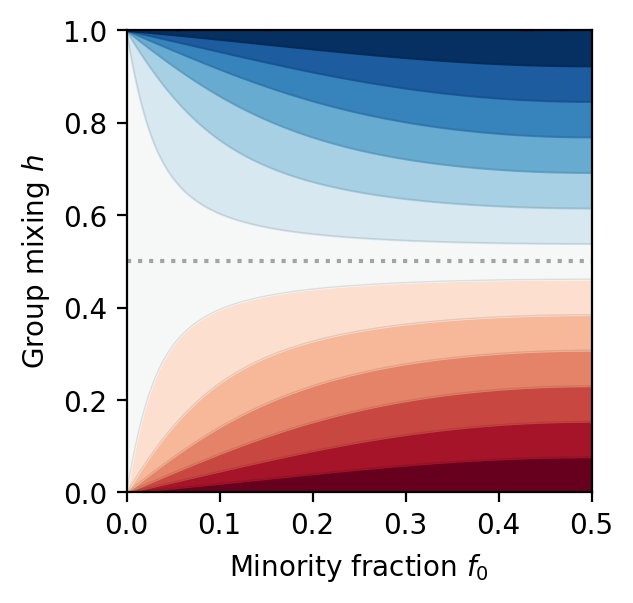

In [23]:
plt.figure(figsize=(3, 3))

values = values_1
cmap = plt.cm.RdBu # RdBu, PuOr
steps = 7
levels_up, levels_down = steps, steps

levels = np.concatenate([np.linspace(values.min(), 0, levels_down)[:-1], np.linspace(0, values.max(), levels_up)])

levels = np.linspace(-1, 1, steps + steps)

colors = cmap(np.concatenate([np.linspace(0, 0.5, levels_down)[:-1], np.linspace(0.5, 1.0, levels_up)]))

mshow = plt.contourf(bss, hss, values, levels, colors=colors, antialiased=True)
plt.contour(bss, hss, values, levels, linestyles="solid", 
            colors=colors,
            antialiased=True, linewidths=1, zorder=2)
plt.contour(bss, hss, values, levels, linestyles="solid", 
            colors='k', alpha=.1,
            antialiased=True, linewidths=.5, zorder=2)
plt.axhline(0.5, color='gray', ls=":", lw=1.5, alpha=0.7)
plt.xlim(0, .5)
plt.ylabel("Group mixing $h$");
plt.xlabel("Minority fraction $f_0$");

### Figure 2D

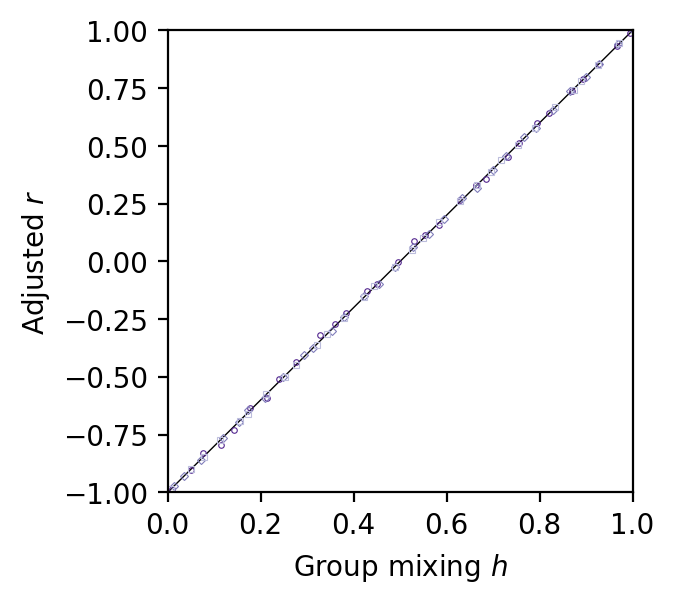

In [24]:
plt.figure(figsize=(3, 3))

b = 0.01
plt.plot([0, 1], [-1, 1.0], color='k', lw=.5)

plt.plot(random_h_0[:max_values], adjusted_assortativity_f_0_1[:max_values], ls="", marker="o", mew=mew_simulation, ms=ms_simulation, mec=colors_h[0], color="None")

b = 0.1
plt.plot(random_h_1[:max_values], adjusted_assortativity_f_0_2[:max_values], ls="", marker="D", mew=mew_simulation, ms=ms_simulation, mec=colors_h[1], color="None")

b = 0.2
plt.plot(random_h_2[:max_values], adjusted_assortativity_f_0_3[:max_values], ls="", marker="s", mew=mew_simulation, ms=ms_simulation, mec=colors_h[2], color="None")

plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.ylabel("Adjusted $r$")
plt.xlabel("Group mixing $h$");

### Figure 2E

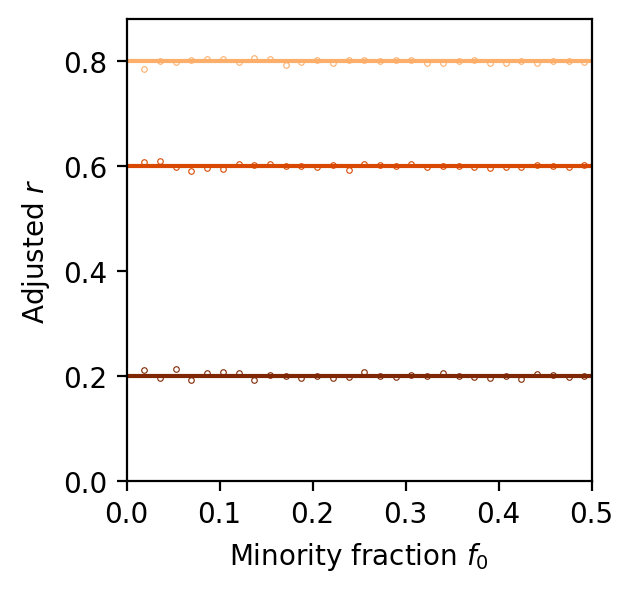

In [25]:
plt.figure(figsize=(3, 3))

h = 0.6
v = [analytical_assortativity(.5, h, h) for f_0 in bss]
plt.plot(bss, v, label="Analytical", color=colors_f_0[0])
plt.plot(random_f_0[:max_values], adjusted_assortativity_h_1[:max_values], ls="", marker="o", mew=mew_simulation, ms=ms_simulation, mec=colors_f_0[0], color="None")

h = 0.8
v = [analytical_assortativity(.5, h, h) for f_0 in bss]
plt.plot(bss, v, label="Analytical", color=colors_f_0[1])
plt.plot(random_f_0[:max_values], adjusted_assortativity_h_2[:max_values], ls="", marker="o", mew=mew_simulation, ms=ms_simulation, mec=colors_f_0[1], color="None")

h = 0.9
v = [analytical_assortativity(.5, h, h) for f_0 in bss]
plt.plot(bss, v, label="Analytical", color=colors_f_0[2])
plt.plot(random_f_0[:max_values], adjusted_assortativity_h_3[:max_values], ls="", marker="o", mew=mew_simulation, ms=ms_simulation, mec=colors_f_0[2], color="None")
plt.ylim(0, .88)
plt.xlim(0, .5)
plt.yticks(np.arange(0, 0.85, 0.2))
plt.ylabel("Adjusted $r$")
plt.xlabel("Minority fraction $f_0$");

### Figure 2F

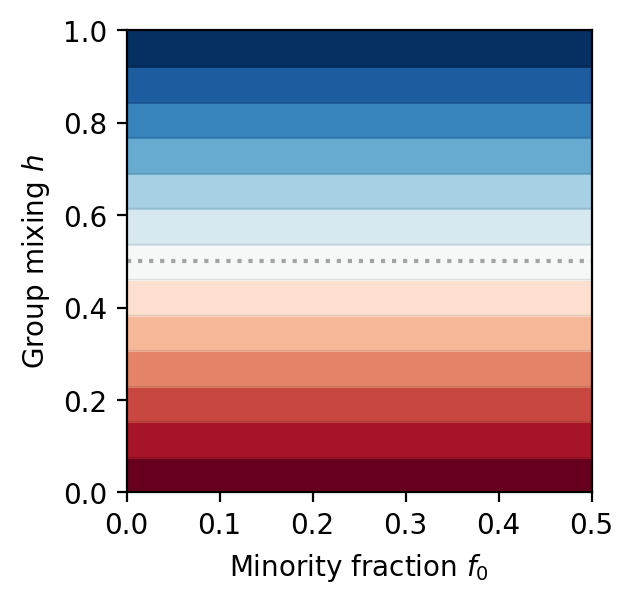

In [26]:
plt.figure(figsize=(3, 3))

values = values_2
cmap = plt.cm.RdBu # RdBu, PuOr
steps = 7
levels_up, levels_down = steps, steps

levels = np.concatenate([np.linspace(values.min(), 0, levels_down)[:-1], np.linspace(0, values.max(), levels_up)])

levels = np.linspace(-1, 1, steps + steps)

colors = cmap(np.concatenate([np.linspace(0, 0.5, levels_down)[:-1], np.linspace(0.5, 1.0, levels_up)]))

mshow = plt.contourf(bss, hss, values, levels, colors=colors, antialiased=True)
plt.contour(bss, hss, values, levels, linestyles="solid", 
            colors=colors,
            antialiased=True, linewidths=1, zorder=2)
plt.contour(bss, hss, values, levels, linestyles="solid", 
            colors='k', alpha=.1,
            antialiased=True, linewidths=.5, zorder=2)
plt.axhline(0.5, color='gray', ls=":", lw=1.5, alpha=0.7)
plt.xlim(0, .5)
plt.ylabel("Group mixing $h$")
plt.xlabel("Minority fraction $f_{0}$");

## Both analytical and simulation

In [27]:
h_1 = 0.2
h_2 = 0.8
N = 300
S = 150

In [28]:
random_f_0 = np.random.rand(S)*0.5
random_f_0 = random_f_0[random_f_0*N >= 1]

In [29]:
assortativity_h_1 = []
assortativity_h_2 = []
for b in random_f_0:
    g = network_generator.er_mixing.generate(N, b, h_1, h_1)
    assortativity_h_1.append(assortativity.nx_assortativity(g, 'color'))
    del g
    g = network_generator.er_mixing.generate(N, b, h_2, h_2)
    assortativity_h_2.append(assortativity.nx_assortativity(g, 'color'))
    del g

### Figure 1A (left)

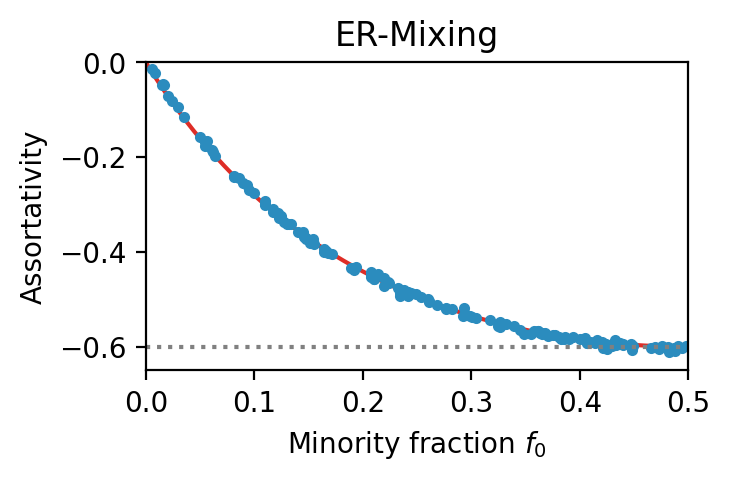

In [30]:
plt.figure(figsize=(3.5, 2))
values = [analytical_assortativity(f_0, h_1, h_1) for f_0 in bss]
plt.plot(bss, values, color="#de2d26", lw=1.5)
plt.plot(random_f_0, assortativity_h_1, ls="", marker="o", ms=3, mec="#2b8cbe", color="#2b8cbe")
plt.axhline(analytical_assortativity(.5, h_1, h_1), color="gray", ls=":")
plt.ylim(-.65, 0)
plt.xlim(0, .5)
plt.locator_params(axis='y', nbins=6)
plt.title("ER-Mixing", fontsize=12)
plt.ylabel("Assortativity")
plt.xlabel("Minority fraction $f_0$");

### Figure 1A (right)

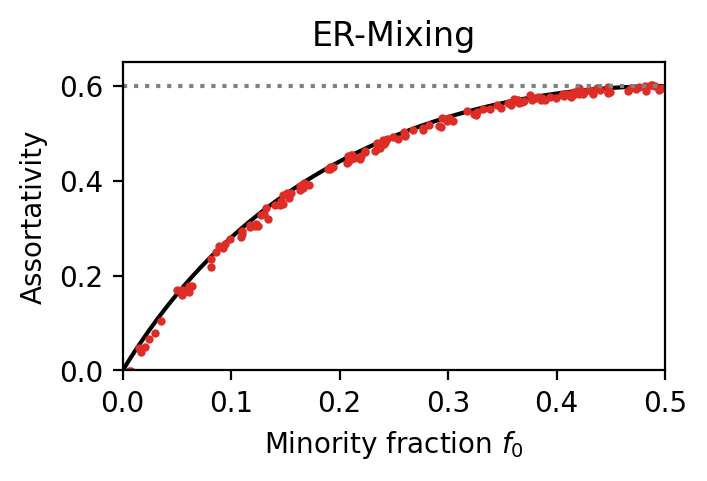

In [31]:
plt.figure(figsize=(3.5, 2))
values = [analytical_assortativity(f_0, h_2, h_2) for f_0 in bss]
plt.plot(bss, values, color="k", lw=1.5)
plt.plot(random_f_0, assortativity_h_2, ls="", marker="o", ms=2., mec="#de2d26", color="#de2d26")

plt.axhline(analytical_assortativity(.5, h_2, h_2), color="gray", ls=":")
plt.ylim(0, .65)
plt.xlim(0, .5)
plt.locator_params(axis='y', nbins=6)
plt.title("ER-Mixing", fontsize=12)
plt.ylabel("Assortativity")
plt.xlabel("Minority fraction $f_0$");